# plot the time difference between SiPM hits in each detector
The goal is to define a time window for the event-collection

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [5]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/'
singles = pd.read_csv(data_path+'Cf252_1000sec_single.dat',delimiter='\t',
                      names=['time [ps]','charge','channel'])
singles['time [ns]'] = singles['time [ps]']/ns
channels = np.array(singles['channel'])
singles['detector'] = [channel2detector(ch) for ch in singles['channel']]
singles[0:10]

,time [ps],charge,channel,time [ns],detector
0,869667606316,3.153210,152,8.696676e+08,3
1,869667607390,2.785793,167,8.696676e+08,3
2,869667607279,3.162609,169,8.696676e+08,3
3,869667606529,2.397472,154,8.696676e+08,3
4,876237371346,1.294540,167,8.762374e+08,3
5,876237367867,3.990044,152,8.762374e+08,3
6,876237362624,5.306873,169,8.762374e+08,3
7,876237369950,2.824280,168,8.762374e+08,3
8,888037797497,1.453831,952,8.880378e+08,6
9,888037797760,1.460613,947,8.880378e+08,6


In [6]:
hits = dict()
for detector,detname in zip([12,3,6,9],['KETEK-1','KETEK-2','SensL-1','SensL-2']):
    hits[detector] = singles[singles['detector']==detector]

In [9]:
bins = np.linspace(-30,30,100) # ns
histo = dict()
for detector,detname in zip([12,3,6,9],['KETEK-1','KETEK-2','SensL-1','SensL-2']):    
    hits_time = np.array(hits[detector]['time [ns]'])
    hits_dt   = np.diff(hits_time)
    histo[detector],edges = np.histogram(hits_dt,bins)
    centers = (edges[:-1]+edges[1:])/2
    
# large bins
bins_large_bins = np.linspace(-1e2,1e6,100) # ns
histo_large_bins = dict()
for detector,detname in zip([12,3,6,9],['KETEK-1','KETEK-2','SensL-1','SensL-2']):    
    hits_time = np.array(hits[detector]['time [ns]'])
    hits_dt   = np.diff(hits_time)
    histo_large_bins[detector],edges = np.histogram(hits_dt,bins_large_bins)
    centers_large_bins = (edges[:-1]+edges[1:])/2    
print('done')

done


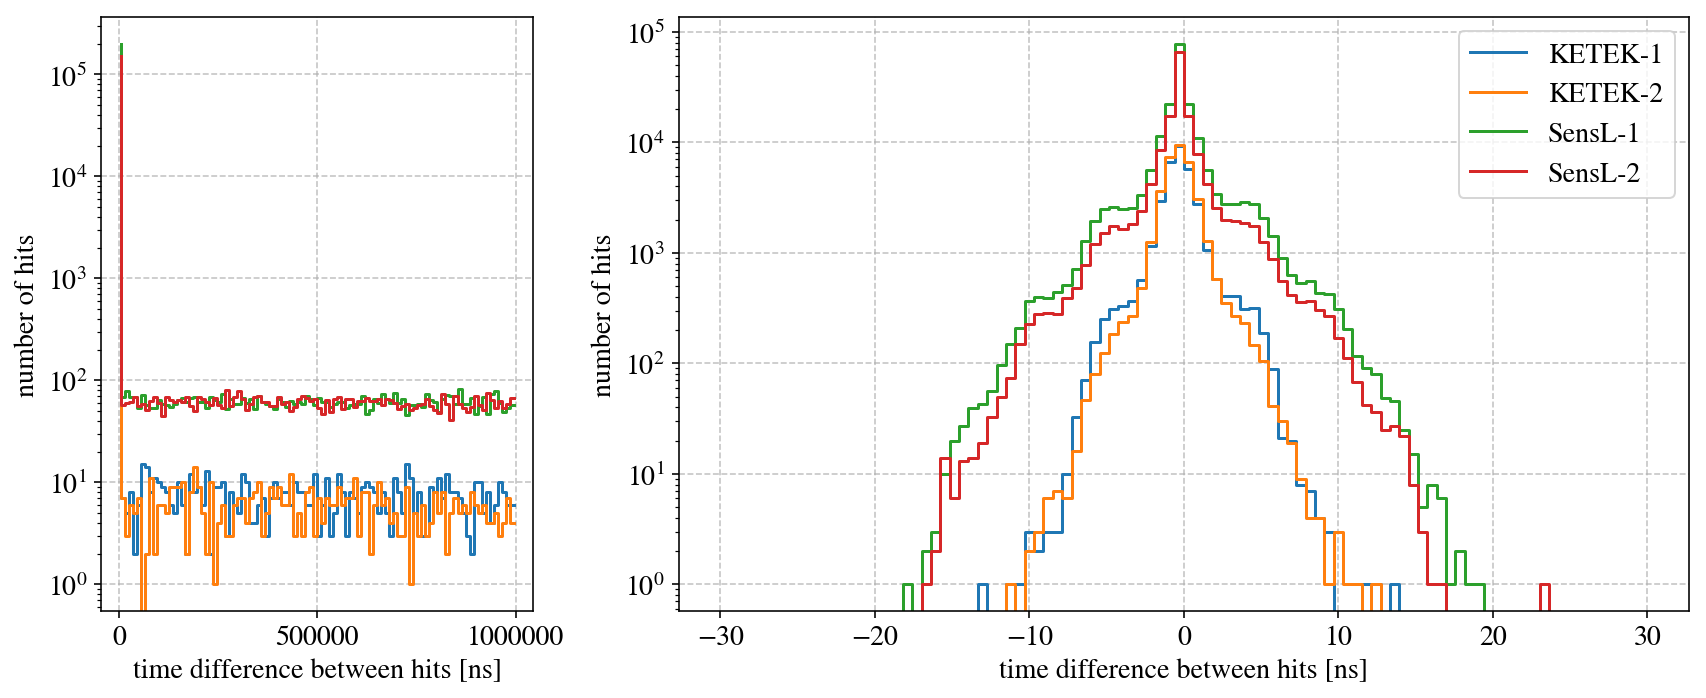

In [10]:
fig=plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,3,1)
for detector,detname in zip([12,3,6,9],['KETEK-1','KETEK-2','SensL-1','SensL-2']):    
    plt.step( centers_large_bins, histo_large_bins[detector] , label=detname )
set_axes(ax,x_label='time difference between hits [ns]',xticks=(0,5e5, 1e6),
         y_label='number of hits',do_add_legend=False,do_add_grid=True,fontsize=14);
ax.set_yscale('log')

ax = fig.add_subplot(1,3,(2,3))
for detector,detname in zip([12,3,6,9],['KETEK-1','KETEK-2','SensL-1','SensL-2']):    
    plt.step( centers, histo[detector] , label=detname )
set_axes(ax,x_label='time difference between hits [ns]',
         y_label='number of hits',do_add_legend=True,do_add_grid=True,fontsize=14);
ax.set_yscale('log')

plt.tight_layout()